<h1 align="center">Mathematical Methods in Engineering - Course Code: 25872</h1>
<h4 align="center">Instructor: Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>
<h4 align="center">Computer Assignment 2</h4>
<h4 align="center">

Questions 1, 2: [Ali Yousefi](https://t.me/BeNameBalasari), Questions 3, 4: [Mahshad Moradi](https://t.me/maahmoradi)

</h4>

## Question 1 ``(30 pt.)``
* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of "Cars" and "Buses" in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.


$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


Change the value of $K$ from 3 to 5. For each degree, plot the data and your model fit and compare the results.

In [248]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

dataset = pd.read_csv(u'arac.csv',sep=';')
BaseYear = 1966
K = 3

In [249]:
x = np.matrix(dataset.Year[0:]).T - BaseYear
cars = np.matrix(dataset.Car[0:]).T
buses = np.matrix(dataset.Bus[0:]).T

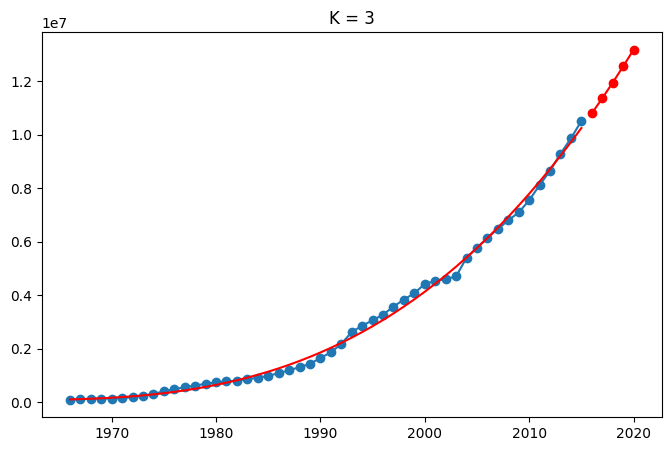

Predicted Numbers for cars
[[10791127.08695196]
 [11356456.74678696]
 [11941292.30405507]
 [12545963.57653596]
 [13170800.38200928]]


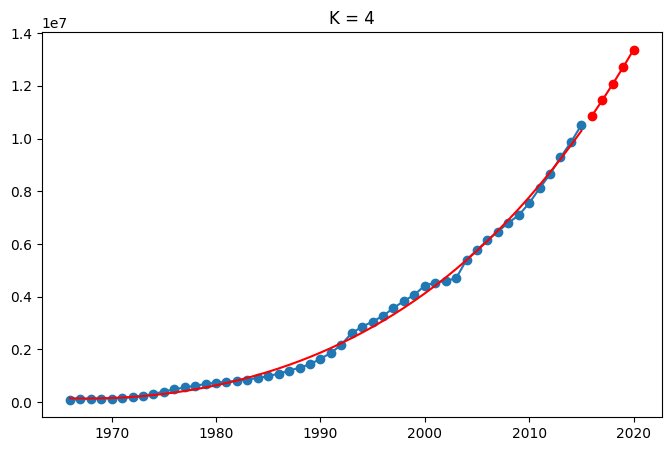

Predicted Numbers for cars
[[10855766.45751246]
 [11446444.89011613]
 [12061016.50774744]
 [12700197.43023841]
 [13364718.08490445]]


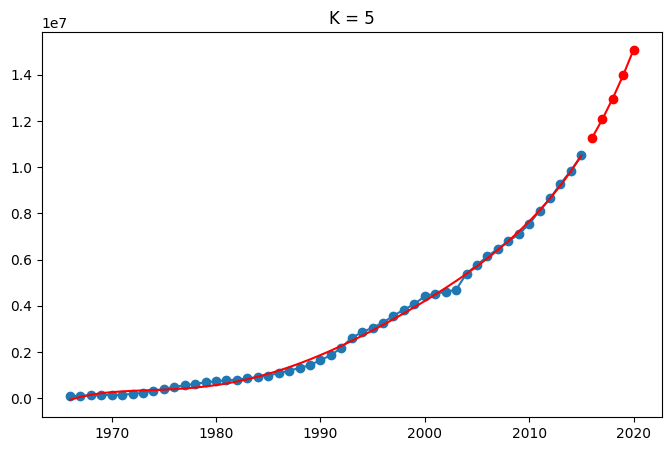

Predicted Numbers for cars
[[11246441.3937044 ]
 [12066928.60766017]
 [12973180.60145149]
 [13975252.60355358]
 [15083992.40897846]]


In [250]:

# In this part, change the value of K and show the results for "Cars"
# You may add new cells to show the results separately

for K in range(3,6):
    # Create Vandermonde Matrix
    A = np.hstack([np.power(x, i) for i in range(K + 1)])

    # Find the W matrix
    # You may use linalg.lstsq here
    W, _, _, _ = np.linalg.lstsq(A, cars, rcond=None)
    f = A.dot(W)


    # Prediction
    TargetYears = np.matrix([2016, 2017, 2018, 2019, 2020]).T-BaseYear
    A2 = np.hstack([np.power(TargetYears, i) for i in range(K + 1)])
    # Predict the number of cars for target years
    f2 = A2.dot(W)

    # Plot the results
    plt.figure(figsize=(8, 5))
    plt.plot(x + BaseYear, cars, 'o-')
    plt.plot(x + BaseYear, f,'r')
    plt.plot(TargetYears+BaseYear, f2, 'ro-')
    plt.title('K = '+str(K))
    plt.show()

    print("Predicted Numbers for cars")
    print(f2)

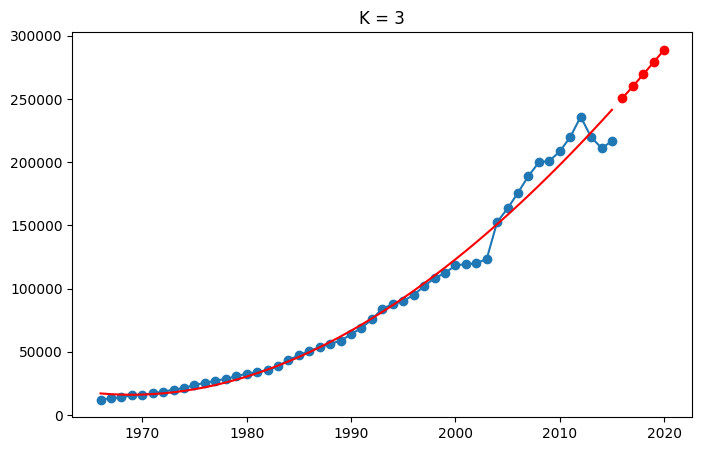

Predicted Numbers for buses
[[250684.75354755]
 [260030.12990447]
 [269525.79351961]
 [279169.84233278]
 [288960.3742838 ]]


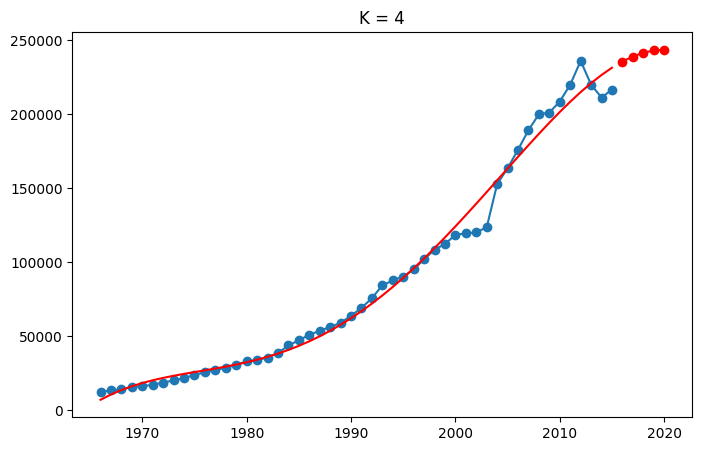

Predicted Numbers for buses
[[235522.28614421]
 [238921.59685154]
 [241442.06807001]
 [242991.18280575]
 [243473.0679562 ]]


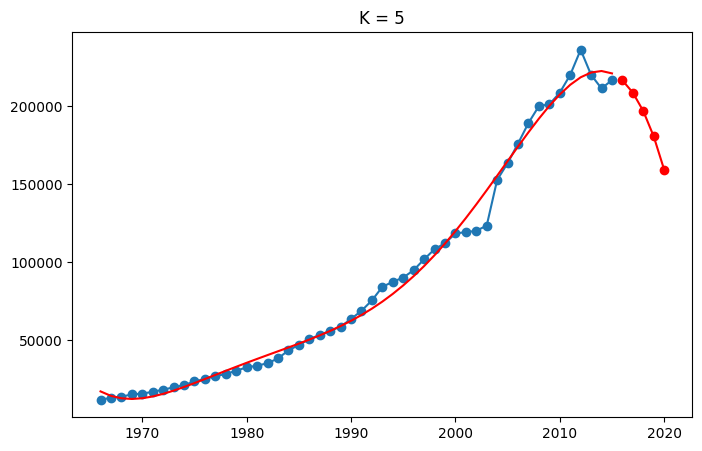

Predicted Numbers for buses
[[216376.7399933 ]
 [208513.9646979 ]
 [196740.24983429]
 [180505.40292483]
 [159217.7357596 ]]


In [251]:
# In this part, change the value of K and show the results for "Buses"
# You may add new cells to show the results separately

for K in range(3,6):
    # Create Vandermonde Matrix
    A = np.hstack([np.power(x, i) for i in range(K + 1)])

    # Find the W matrix
    # You may use linalg.lstsq here
    W, _, _, _ = np.linalg.lstsq(A, buses, rcond=None)
    f = A.dot(W)


    # Prediction
    TargetYears = np.matrix([2016, 2017, 2018, 2019, 2020]).T-BaseYear
    A2 = np.hstack([np.power(TargetYears, i) for i in range(K + 1)])
    # Predict the number of cars for target years
    f2 = A2.dot(W)



    # Plot the results
    plt.figure(figsize=(8, 5))
    plt.plot(x + BaseYear, buses, 'o-')
    plt.plot(x + BaseYear, f,'r')
    plt.plot(TargetYears+BaseYear, f2, 'ro-')
    plt.title('K = '+str(K))
    plt.show()

    print("Predicted Numbers for buses")
    print(f2)

## Question 2 ``(30 pt.)``

As you learned in the course, the least squares method is a way of estimating a function given sample points $$(x_i, y_i), \quad  0 \leq i \leq n$$ with the assumption of linearity of the underlying function.
### step 1
Create n=10 sample points $(x_i, y_i)$ where $$y_i = 2x_i + 3 + \epsilon_i$$ $\epsilon_i$ is an error term (measurement error etc.) added to $y_i$ and is modeled by random variables: $\epsilon_i \stackrel{iid}{\sim} \mathcal{N}(0, 1) $  . The x's should range from 0 to 5 and be evenly spaced (hint: use numpy's linspace function)
### step 2
Given the samples of the previous part, try to estimate a linear function that models the relationship between $x_i$'s and $y_i$'s using the least squares method (find a and b such that the error function $\sum_{i=0}^{n-1} ||ax_i + b - y_i||^2$ is minimized)
### step 3
Plot the sample points and the line you estimated in the previous part in the same graph using matplotlib.
### step 4
Plot the error function $\sum_{i=0}^{n-1} ||ax_i + b - y_i||^2$ as a function of n where $10\leq n \leq 50$ and a and b are the least squares estimates of the line $ax + b = y$.
### step 5
Repeat part 1 but this time create n=20 sample points with a quadratic term added to y: $$y_i = x^2_i + 2x_i + 3 + \epsilon_i$$ $\epsilon_i$ has the same distribution as before and x's range from 0 to 5 likewise.
### step 6
Try to use the least squares method to estimate the coefficients of the quadratic function given the sample points of part 5 (hint: in the least squares method we minimze the norm of the error vector $||Ax-y||^2$. Add a column to matrix A for the quadratic terms and then try to minimize the error function using the least squares method).
### step 7
Repeat part 3 for the estimated quadratic function of the previous part.

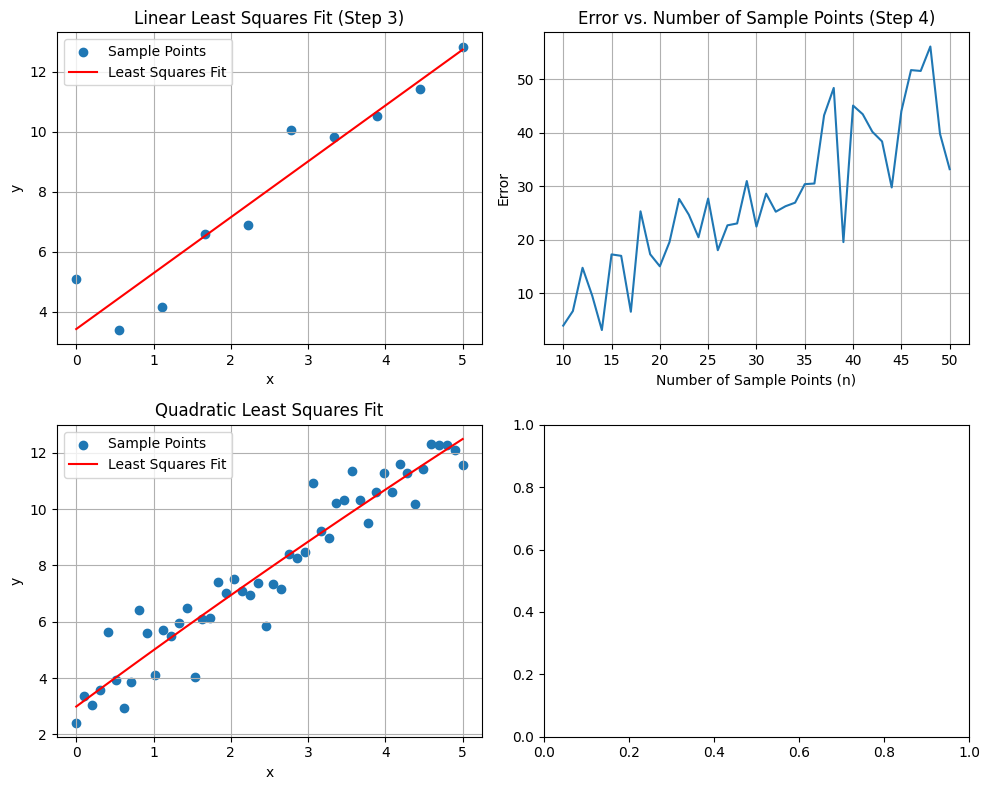

In [252]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1
n = 10
x = np.linspace(0, 5, n)
epsilon = np.random.normal(0, 1, n)
y = 2 * x + 3 + epsilon

# Step 2
A = np.vstack([x, np.ones(len(x))]).T
a, b = np.linalg.lstsq(A, y, rcond=None)[0]

# Step 3
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot sample points and linear fit
axs[0, 0].scatter(x, y, label='Sample Points')
axs[0, 0].plot(x, a*x + b, color='red', label='Least Squares Fit')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('y')
axs[0, 0].set_title('Linear Least Squares Fit (Step 3)')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Step 4
error_values = []
n_values = range(10, 51)
for n in n_values:
    x = np.linspace(0, 5, n)
    epsilon = np.random.normal(0, 1, n)
    y = 2 * x + 3 + epsilon
    A = np.vstack([x, np.ones(len(x))]).T
    a, b = np.linalg.lstsq(A, y, rcond=None)[0]
    error = np.sum(np.square(a*x + b - y))
    error_values.append(error)

# Plot error vs. number of sample points
axs[0, 1].plot(n_values, error_values)
axs[0, 1].set_xlabel('Number of Sample Points (n)')
axs[0, 1].set_ylabel('Error')
axs[0, 1].set_title('Error vs. Number of Sample Points (Step 4)')
axs[0, 1].grid(True)

# Step 6
A = np.vstack([x**2, x, np.ones(len(x))]).T
coefficients = np.linalg.lstsq(A, y, rcond=None)[0]

# Step 7
# Plot sample points and quadratic fit
axs[1, 0].scatter(x, y, label='Sample Points')
axs[1, 0].plot(x, coefficients[0]*x**2 + coefficients[1]*x + coefficients[2], color='red', label='Least Squares Fit')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('y')
axs[1, 0].set_title('Quadratic Least Squares Fit')
axs[1, 0].legend()
axs[1, 0].grid(True)

plt.tight_layout()
plt.show()

## Question 3 ``(35 pt.)``

A structure's various components can be represented by a single **state vector**, which changes over time due to certain processes. This changing state vector, when modeled using linear transformations at discrete intervals, forms the basis of a **discrete dynamical system**.

Starting with an initial state $X_0$, transitions to subsequent states are governed by a matrix $P$, embodying linear transformations. For instance, $X_1 = PX_0$ marks the first transition, leading to a sequence where $X_2 = P^2X_0$, $X_3 = P^3X_0$, and so forth, generalizing to $X_t = PX_{t-1}$ for each time step $t$.

This approach is particularly effective in modeling web navigation, where each webpage's visit probability at any given time is captured by the state vector $X_t$. The transition matrix $P$ specifies the likelihood of moving from one page to another, with each element $p_{ij}$ representing the probability of transitioning from page $j$ to page $i$. To ensure the model's consistency, the sum of probabilities in each column of $P$ must equal one, reflecting the comprehensive distribution of navigating from any given page to the next.

In [253]:
## IMPORTS 
import numpy as np
import math

To illustrate with a small set of pages, say $n=5$, we construct matrix $P$ adhering to the principle that all diagonal elements are $0$, emphasizing no page links back to itself immediately. Additionally, to ensure that navigation probabilities from one page to another are properly distributed, the sum of the entries in each column of $P$ must equal one. Here's how such a matrix might look for $n=5$:

$$P=
\begin{bmatrix}
0 & 0.2 & 0.3 & 0.4 & 0.1 \\
0.3 & 0 & 0.2 & 0.1 & 0.4 \\
0.2 & 0.3 & 0 & 0.2 & 0.3 \\
0.1 & 0.2 & 0.4 & 0 & 0.1 \\
0.4 & 0.3 & 0.1 & 0.3 & 0.1
\end{bmatrix}$$

This configuration ensures a balanced probability distribution for transitions between pages, making our web navigation model realistic.

For the initial state vector $X_0$, where the browser starts at page $4$, $X_0$ would be a vector with its fourth entry as one and all others as zero, representing a 100% probability of starting from page 4.

Write a function to compute the navigation probabilities to all five pages after t transition. Then use the function to calculate a new vector $X_t$, representing the probabilities that the browser is on each of the five pages after following t links from the starting page. At last apply the function on $X_0$ assuming symmetric transition probabilities and t to be 10.

In [254]:
### START CODE HERE ###
def compute_navigation_probabilities(P, X_0, t):
    X_t = X_0
    for _ in range(t):
        X_t = np.dot(P, X_t)
    return X_t
P = P = np.array([
    [0, 0.2, 0.3, 0.1, 0.4],
    [0.2, 0, 0.2, 0.5, 0.1],
    [0.3, 0.2, 0, 0.2, 0.3],
    [0.1, 0.5, 0.2, 0, 0.2],
    [0.4, 0.1, 0.3, 0.2, 0]
])

### END CODE HERE ###

print(sum(P))

[1. 1. 1. 1. 1.]


In [255]:
### START CODE HERE ###

X_0 = np.array([0, 0, 0, 1, 0])  # Initial state vector with the browser starting at page 4

# Compute the navigation probabilities after t transitions
t = 10
X_t = compute_navigation_probabilities(P, X_0, t)
print("Navigation probabilities after {} transitions:".format(t))
print(X_t)

### END CODE HERE ###

Navigation probabilities after 10 transitions:
[0.20069608 0.1988641  0.19999977 0.20113596 0.19930409]


Predicting long-term visit probabilities, represented by $X_m$ for a large $m$, reveals which pages are likely to be frequented after extensive random navigation. However, repeatedly applying transformations to achieve this is computationally intensive. Leveraging eigenvalues and eigenvectors can substantially streamline the process, significantly minimizing the computational workload.

Find eigenvalues and eigenvectors for the previously defined matrix $P$.

In [256]:
### START CODE HERE ###

eigenvalues, eigenvectors = np.linalg.eig(P)

# Print eigenvalues
print("Eigenvalues:")
for i, eigenvalue in enumerate(eigenvalues):
    print("λ{} = {}".format(i+1, eigenvalue))

# Print eigenvectors
print("\nEigenvectors:")
for i, eigenvector in enumerate(eigenvectors.T):
    print("v{} = {}".format(i+1, eigenvector))

### END CODE HERE ###

Eigenvalues:
λ1 = 0.9999999999999993
λ2 = 0.17912878474779187
λ3 = -0.5618033988749896
λ4 = -0.27912878474779196
λ5 = -0.3381966011250106

Eigenvectors:
v1 = [0.4472136 0.4472136 0.4472136 0.4472136 0.4472136]
v2 = [ 0.42747244 -0.54022368  0.2255025  -0.54022368  0.42747244]
v3 = [ 3.71748034e-01 -6.01500955e-01  2.57413502e-16  6.01500955e-01
 -3.71748034e-01]
v4 = [-0.34244316 -0.0903237   0.86553372 -0.0903237  -0.34244316]
v5 = [-6.01500955e-01 -3.71748034e-01  1.26222038e-15  3.71748034e-01
  6.01500955e-01]


A **Markov matrix** is characterized by its square shape, nonnegative entries, and the property that the sum of the elements in each column equals $1$. A key attribute of Markov matrices is that they always possess an eigenvalue of $1$. 

Given that matrix $P$ is designed as a Markov matrix, it naturally includes an eigenvalue of $1$. This feature allows us to express the equation $X_m = PX_{m-1}$ in a simplified form as $PX_{m-1} = 1 \times X_m$. For long-term probability predictions within $X_m$, identifying an eigenvector associated with the eigenvalue $1$ is crucial. This is because it leads to the simplified equation $PX = X$, facilitating the determination of steady-state probabilities without extensive computations.

After doing so check if your answer satisfies the equation with proper code. (use np.isclose)

In [257]:
### START CODE HERE ###

# Find the index of eigenvalue 1
index = np.where(np.isclose(eigenvalues, 1))

# Extract the corresponding eigenvector and reshape it
eigenvector = eigenvectors[:, index].reshape(-1, 1)

m = 50
X_m = compute_navigation_probabilities(P, X_0, m)
print(X_m)

# Check if PX_m = X_m+1
satisfies_equation = np.isclose(np.dot(P, X_m), X_m)

print("Does PX = X?")
print(satisfies_equation)

### END CODE HERE ###

[0.2 0.2 0.2 0.2 0.2]
Does PX = X?
[ True  True  True  True  True]


Explain the above results : ## HERE

Make sure that your vector satisfies the probability vector criteria.

In [258]:
### START CODE HERE ###
#shown above

### END CODE HERE ###

print("Probabilities being at each of the pages:\n" + str(X_m))

Probabilities being at each of the pages:
[0.2 0.2 0.2 0.2 0.2]


In a more realistic model of the web, some pages may not have outbound links (dangling nodes), and users may sometimes choose to navigate to a random page rather than following an outbound link. The Google PageRank algorithm introduces a damping factor to model this behavior, making the Markov process more reflective of real-world web navigation.

Dangling nodes are pages without outbound links. These nodes would lead to columns of zeros in the transition matrix, which is problematic for calculating the steady state. To address this, distribute the probability mass of dangling nodes equally among all pages.

First identify dangling nodes then djust the transition matrix $P$ by redistributing the dangling nodes' probability mass equally across all pages, ensuring every column sums to 1.

In [259]:
# Example transition matrix for a small web model, including a dangling node
# Assume 4 pages, with the 4th page being a dangling node
P = np.array([
    [0, 0, 0, 0, 0],     # Probabilities from each page to Page 1
    [1, 0, 0.5, 0, 0],   # Probabilities from each page to Page 2
    [0, 0, 0, 0.5, 0],   # Probabilities from each page to Page 3
    [0, 1, 0.5, 0, 0],   # Probabilities from each page to Page 4
    [0, 0, 0, 0.5, 0]    # Page 5 is a dangling node
])

### START CODE HERE ###

# Identify dangling nodes (columns with all zero entries)
dangling_nodes = np.where(np.all(P == 0, axis=0))[0]

# Calculate the redistribution probability for dangling nodes
redistribution_prob = 1 / P.shape[0]

# Adjust the transition matrix by redistributing the probability mass of dangling nodes equally
for node in dangling_nodes:
    P[:, node] = redistribution_prob

# Ensure every column sums to 1
P = P / np.sum(P, axis=0)

print("Adjusted transition matrix P:")
print(P)

### END CODE HERE ###

Adjusted transition matrix P:
[[0.  0.  0.  0.  0.2]
 [1.  0.  0.5 0.  0.2]
 [0.  0.  0.  0.5 0.2]
 [0.  1.  0.5 0.  0.2]
 [0.  0.  0.  0.5 0.2]]


The damping factor models the behavior of web surfers who occasionally jump to a random page instead of following outbound links. This factor, usually set to 0.85, balances between following links ($P$) and jumping at random ($\frac{1}{n}$, where \(n\) is the number of pages).

Apply the damping factor $d$ to the transition matrix $P$ to get $P' = dP + \frac{1-d}{n}E$, where $E$ is an $n \times n$ matrix with all elements equal to $\frac{1}{n}$.

In [260]:
### START CODE HERE ###

# Define the damping factor
damping_factor = 0.85

# Calculate the size of the matrix
n = P.shape[0]
print(n)

# Create the E matrix
E = np.full_like(P, 1/n)
print(E)

# Apply the damping factor to the transition matrix P
P_prime = damping_factor * P + ((1 - damping_factor) / n) 

print("Adjusted transition matrix P':")
print(P_prime)

### END CODE HERE ###

5
[[0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]]
Adjusted transition matrix P':
[[0.03  0.03  0.03  0.03  0.2  ]
 [0.88  0.03  0.455 0.03  0.2  ]
 [0.03  0.03  0.03  0.455 0.2  ]
 [0.03  0.88  0.455 0.03  0.2  ]
 [0.03  0.03  0.03  0.455 0.2  ]]


The steady state distribution with the damping factor reflects a more realistic scenario of web page navigation. Finding this distribution involves solving for the principal Eigenvector of the modified transition matrix $P'$.

Use linear algebra techniques to compute the Eigenvector corresponding to the Eigenvalue of 1 for the modified matrix $P'$.
Normalize this Eigenvector to represent the steady-state distribution of page ranks.

In [261]:
### START CODE HERE ###

def solve(A):
    n, m = A.shape
    _, _, V = np.linalg.svd(A)
    null_space_basis = V.T[:, -1]  
    x = null_space_basis / np.sum(null_space_basis)
    return x
def find_eigenvector(A):
    A = A.copy()-np.eye(A.shape[0])
    return(solve(A))
print('staty state probabilities :  \n',find_eigenvector(P_prime).reshape(n,1))

### END CODE HERE ###

staty state probabilities :  
 [[0.06444052]
 [0.20531626]
 [0.20259129]
 [0.32506064]
 [0.20259129]]


Real-world web link structures can be vast, resulting in large, sparse transition matrices. Direct computation methods become impractical, necessitating efficient computational strategies.

Represent the transition matrix $P$ and modifications using sparse matrix techniques to handle large datasets. Then implement an iterative method, such as the power iteration algorithm, to find the principal Eigenvector efficiently.

In [262]:
### START CODE HERE ###



### END CODE HERE ###

Given the transition matrix below, complete the function pagerank to handel the normalization of the matrix, apply damping and find its corresponding steady state vector.

In [263]:
def pageRank(X,n):
    ### START CODE HERE ###
    X=np.array(X)
    X_normal = X / X.sum(axis=0)
    X_damped = damping_factor * X_normal + ((1 - damping_factor) / n)
    steadystatevector = find_eigenvector(X_damped)
    ### END CODE HERE ###
    return steadystatevector 

matrix2 = [ [0, 0, 1, 0, 0, 0, 0, 0],
            [1, 0, 0, 1, 0, 0, 0, 0],
            [1, 0, 0, 0, 0, 0, 0, 0],
            [1, 1, 1, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 1, 0, 0],
            [0, 0, 0, 0, 0, 0, 1, 1],
            [0, 0, 0, 1, 1, 0, 0, 1],
            [0, 0, 0, 0, 0, 1, 0, 0]  ]
print("\n2) matrix 2 = ", matrix2)
print("steady state vector: ")
print(pageRank(matrix2,8))
# expected output: [0.03037, 0.0536, 0.02735, 0.0617, 0.1621, 0.2836, 0.2419, .1393]


2) matrix 2 =  [[0, 0, 1, 0, 0, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 1, 1, 0, 0, 1], [0, 0, 0, 0, 0, 1, 0, 0]]
steady state vector: 
[0.0303766  0.05360745 0.0273567  0.06176647 0.16206337 0.28360049
 0.24194871 0.13928021]


## Question 4 ``(35 pt.)``

Auto-regressive (AR) models are fundamental in signal processing for modeling time series data. An AR model predicts future values based on a linear combination of past values. Mathematically, it's represented as 
$$
\hat{y}[t] = \sum_{i=1}^{p} a_i y[t-i]
$$, 
where $\hat{y}[t]$ is the predicted value at time $t$, $y[t-i]$ are the past values, and $a_i$ are the coefficients that need to be determined. Cross-regressive models extend this concept by modeling the relationship between two different time series, predicting values of one series using past values of another.

Load the data, qbo.txt. This consists of three data streams from temperature readings associated with the Quasi-Biennial Oscillation (QBO), sampled at one month intervals. These are shown below.


<!-- ![alt text](QBO.png) -->

<div style="text-align: center;">
    <img src="QBO.png" alt="alt text" width="600" height="500">
</div>

In [264]:
## IMPORTS
import numpy as np
import matplotlib.pyplot as plt
import cv2
from pygsp import graphs

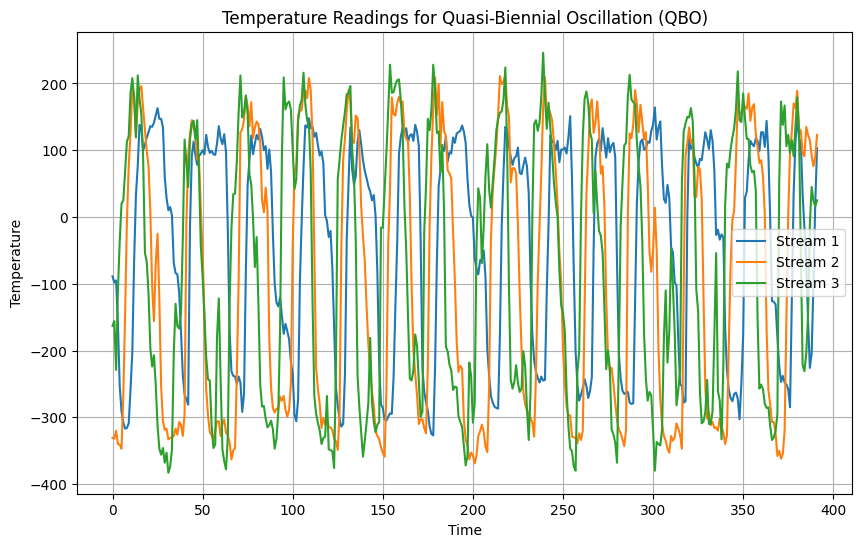

In [265]:
### START CODE HERE ###

# Load the data from the file
data = np.loadtxt('qbo.txt')

# Extract the three data streams
stream1 = data[:, 0]
stream2 = data[:, 1]
stream3 = data[:, 2]

# Plot the three data streams
plt.figure(figsize=(10, 6))
plt.plot(stream1, label='Stream 1')
plt.plot(stream2, label='Stream 2')
plt.plot(stream3, label='Stream 3')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature Readings for Quasi-Biennial Oscillation (QBO)')
plt.legend()
plt.grid(True)
plt.show()

### END CODE HERE ###

Formulate the AR model for the first time series. Define the order of the model $p$, which represents how many past values will be considered to predict the current value. The choice of $p$ can significantly affect model performance.

In [266]:
### START CODE HERE ###

# Define the order of the AR model (p)
p = 3  # You can adjust this value based on your choice

# Extract the first time series data
y = stream1

# Construct the design matrix
X = np.zeros((len(y) - p, p))
for i in range(p):
    X[:, i] = y[p-i-1:-i-1]

# Target vector (shifted by p)
y_target = y[p:]

# Estimate coefficients using least squares estimation
coefficients = np.linalg.lstsq(X, y_target, rcond=None)[0]

# Print the estimated coefficients
print("Estimated Coefficients (a_i):", coefficients)

### END CODE HERE ###

Estimated Coefficients (a_i): [ 1.51968669 -0.62871205  0.00336187]


Construct an embedding matrix from lagged versions of the data series. This matrix, often denoted as $M$, captures the structure of dependencies in past values. Use the pseudo-inverse of $M$ to solve for the coefficients $a_i$ that minimize the prediction error in a least squares sense.

In [267]:
### START CODE HERE ###

M_pseudo_inv = np.linalg.pinv(X)

# Estimate coefficients using pseudo-inverse
coefficients = np.dot(M_pseudo_inv, y_target)

# Print the estimated coefficients
print("Estimated Coefficients (a_i):", coefficients)

### END CODE HERE ###

Estimated Coefficients (a_i): [ 1.51968669 -0.62871205  0.00336187]


Assess the fitted model by comparing the predicted values against actual values using metrics such as the Mean Squared Error (MSE) or the coefficient of determination ($R^2$).

In [268]:
### START CODE HERE ###

# Predict the values using the estimated coefficients
y_pred = np.dot(X, coefficients)

mse = np.mean((y[p:] - y_pred) ** 2)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared manually
mean_y = np.mean(y[p:])
ss_total = np.sum((y[p:] - mean_y) ** 2)
ss_residual = np.sum((y[p:] - y_pred) ** 2)
r2 = 1 - (ss_residual / ss_total)
print("Coefficient of Determination (R^2):", r2)

### END CODE HERE ###

Mean Squared Error (MSE): 2057.980034303985
Coefficient of Determination (R^2): 0.9187093292730084


**Cross-regression**  - Modify the embedding matrix method, so that p

$$
\hat{y}[t] = \sum_{i=1}^{p} a_i z[t-i]
$$, 

in which y is being modelled by observing another timeseries, z. The coefficients of this model now describe the cross- regression i.e. how the past of z effects the present value of y. We can look at the magnitude of the coefficients as well as the predictions of y to give an idea about the information that ‘flows’ from z to y. Do any of the timeseries have strong interactions? If so, is there any indication of which one is driving which?

In [269]:
### START CODE HERE ###



### END CODE HERE ###

Use the cv2 package to load a grayscale version of the cameraman image with a relatively low resolution, 128 by 128, then display the image using matplotlib.pyplot

Do not forget to convert RGB to gray to reduce the 3 color channels to one

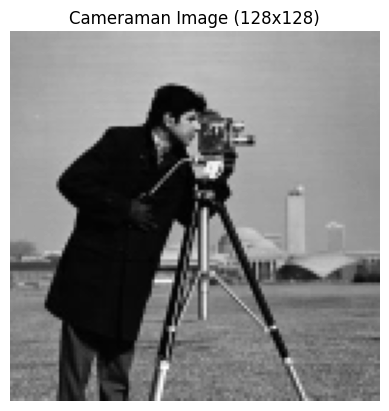

In [270]:
### START CODE HERE ###

# Load the image in grayscale using cv2
image = cv2.imread('cameraman.jpg', cv2.IMREAD_GRAYSCALE)

# Check the original image size
height, width = image.shape

# Specify the desired resized dimensions
desired_height = 128
desired_width = 128

# Resize the image if the original dimensions are larger
if height > desired_height or width > desired_width:
    interpolation = cv2.INTER_AREA  # Use interpolation for shrinking
    image_resized = cv2.resize(image, (desired_width, desired_height), interpolation=interpolation)
else:
    image_resized = image

# Display the resized image using matplotlib
plt.imshow(image_resized, cmap='gray')
plt.axis('off')  # Hide axis
plt.title('Cameraman Image (128x128)')
plt.show()

### END CODE HERE ###

In [271]:
!pip install pygsp

from pygsp import graphs, filters, plotting

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [272]:
### do not edit this cell 
G = graphs.Grid2d(128,128)
L = G.L

Flatten the grayscale image into a vector. Apply the filter by multiplying $L$ with the flattened image vector: $x_{filtered} = Lx$. Reshape $x_{filtered}$ back to the original image dimensions.

Display the filtered image.

In [273]:
### START CODE HERE ###

G = graphs.Grid2d(128, 128)
L = G.L

image_flat = image_resized.flatten()

# Apply the filter by multiplying L with the flattened image vector
image_filtered_flat = np.dot(L, image_flat)

# Reshape the filtered image back to the original dimensions
image_filtered = np.reshape(image_filtered_flat, (128, 128))

# Display the filtered image
plt.imshow(image_filtered, cmap='gray')
plt.axis('off')
plt.title('Filtered Image')
plt.show()

#couldn't run this section at the end but i didn't understand it's problem

### END CODE HERE ###

MemoryError: Unable to allocate 636. KiB for an array with shape (81408,) and data type float64

Formulate the inverse problem as a least squares problem. Then solve the inverse problem to get the reconstructed image. Finally display the original, filtered and the reconstructed images in a subplot. Use $\textbf{lsqr}$ from $\textbf{scipy.sparse.linalg}$ to solve least squares knowing that L is in sparse format. 

In [ ]:
### START CODE HERE ###


### END CODE HERE ###